#EDA 1

#BIKE DETAILS DATASET

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

In [5]:
path="/content/drive/MyDrive/dataset/used_bikes.csv"
df=pd.read_csv(path)
df.head(1062)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


1.What is the range of selling prices in the dataset?

In [10]:
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
price_range = max_price - min_price

print(f"The range of selling prices is: {price_range}")

The range of selling prices is: 755000


2.What is the median selling price for bikes in the dataset?

In [12]:
median_price = df['selling_price'].median()
print(f"The median selling price is: {median_price}")

The median selling price is: 45000.0


3.What is the most common seller type?

In [14]:
most_common_seller = df['seller_type'].mode()[0]
print(f"The most common seller type is: {most_common_seller}")

The most common seller type is: Individual


4.How many bikes have driven more than 50,000 kilometers?

In [16]:
bikes_over_50k = len(df[df['km_driven'] > 50000])
print(f"The number of bikes that have driven more than 50,000 kilometers is: {bikes_over_50k}")

The number of bikes that have driven more than 50,000 kilometers is: 170


5. What is the average km_driven value for each ownership type?

In [18]:
average_km_by_ownership = df.groupby('owner')['km_driven'].mean()
print(f"The average km_driven value for each ownership type is:\n{average_km_by_ownership}")

The average km_driven value for each ownership type is:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


6.What proportion of bikes are from the year 2015 or older?

In [20]:
proportion_2015_older = len(df[df['year'] <= 2015]) / len(df)
print(f"The proportion of bikes from 2015 or older is: {proportion_2015_older}")

The proportion of bikes from 2015 or older is: 0.5664467483506126


7.What is the trend of missing values across the dataset?

In [22]:
missing_values = df.isnull().sum()
print(f"The trend of missing values across the dataset is:\n{missing_values}")

The trend of missing values across the dataset is:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


8.What is the highest ex_showroom_price recorded, and for which bike?

In [24]:
highest_price = df['ex_showroom_price'].max()
bike_with_highest_price = df.loc[df['ex_showroom_price'] == highest_price, 'name'].iloc[0]

print(f"The highest ex_showroom_price is: {highest_price}")
print(f"The bike with the highest ex_showroom_price is: {bike_with_highest_price}")

The highest ex_showroom_price is: 1278000.0
The bike with the highest ex_showroom_price is: Harley-Davidson Street Bob


9. What is the total number of bikes listed by each seller type?

In [26]:
bike_count_by_seller = df.groupby('seller_type')['name'].count()
print(f"The total number of bikes listed by each seller type is:\n{bike_count_by_seller}")

The total number of bikes listed by each seller type is:
seller_type
Dealer           6
Individual    1055
Name: name, dtype: int64


10.What is the relationship between selling_price and km_driven for first-owner bikes?

In [31]:
first_owner_bikes = df[df['owner'] == 'First Owner']
correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])

print(f"The correlation between selling_price and km_driven for first-owner bikes is: {correlation}")

The correlation between selling_price and km_driven for first-owner bikes is: nan


11.Identify and remove outliers in the km_driven column using the IQR method.

In [33]:
# Calculate Q1, Q3, and IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Print the shape of the DataFrame before and after outlier removal
print("Shape before outlier removal:", df.shape)
print("Shape after outlier removal:", df_no_outliers.shape)


Shape before outlier removal: (1061, 7)
Shape after outlier removal: (1022, 7)


12.Perform a bivariate analysis to visualize the relationship between year and selling_price.

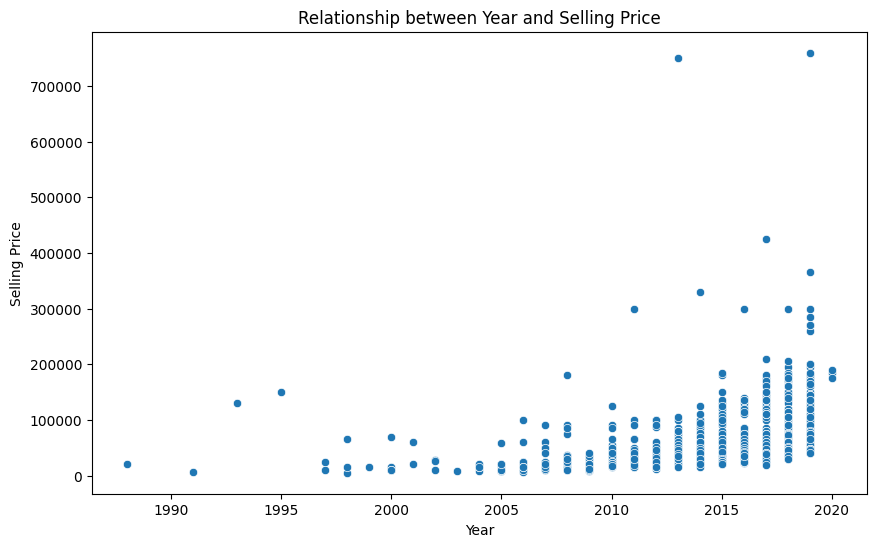

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

In [39]:
current_year = 2023
df['bike_age'] = current_year - df['year']

average_price_by_age = df.groupby('bike_age')['selling_price'].mean()

depreciation_rates = average_price_by_age.pct_change()

print(depreciation_rates)

bike_age
3          NaN
4    -0.347148
5    -0.267602
6    -0.099995
7    -0.258898
8    -0.033676
9    -0.138617
10    0.050728
11   -0.300929
12   -0.002593
13   -0.108324
14   -0.299606
15    0.539856
16   -0.273021
17   -0.062083
18   -0.273799
19   -0.110644
20   -0.470199
21    1.583333
22    0.935484
23   -0.479167
24   -0.280000
25    0.888889
26   -0.382353
28    7.571429
30   -0.133333
32   -0.953846
35    2.333333
Name: selling_price, dtype: float64


14.Which bike names are priced significantly above the average price for their manufacturing year?

In [41]:
average_price_by_year = df.groupby('year')['selling_price'].mean()

df['average_price_for_year'] = df['year'].map(average_price_by_year)

df['price_difference'] = df['selling_price'] - df['average_price_for_year']

threshold = 2 * df['price_difference'].std()

significantly_above_average = df[df['price_difference'] > threshold]

print(significantly_above_average['name'])

7      Royal Enfield Bullet 350 [2007-2011]
13                            Yamaha YZF R3
130        Royal Enfield Continental GT 650
134              Harley-Davidson Street Bob
146                              KTM RC 390
242                              KTM RC 390
261           Royal Enfield Interceptor 650
288                              KTM RC 390
289          Kawasaki Ninja 650 [2018-2019]
295                         Suzuki GSX S750
311              Harley-Davidson Street 750
315           Royal Enfield Interceptor 650
344                              BMW G310GS
407           Royal Enfield Interceptor 650
411            KTM 390 Duke ABS [2013-2016]
449           Royal Enfield Classic Signals
860          Kawasaki Ninja 650 [2018-2019]
890            Royal Enfield Classic Chrome
892                            KTM 390 Duke
897                      Kawasaki Ninja 300
Name: name, dtype: object


15.Develop a correlation matrix for numeric columns and visualize it using a heatmap.

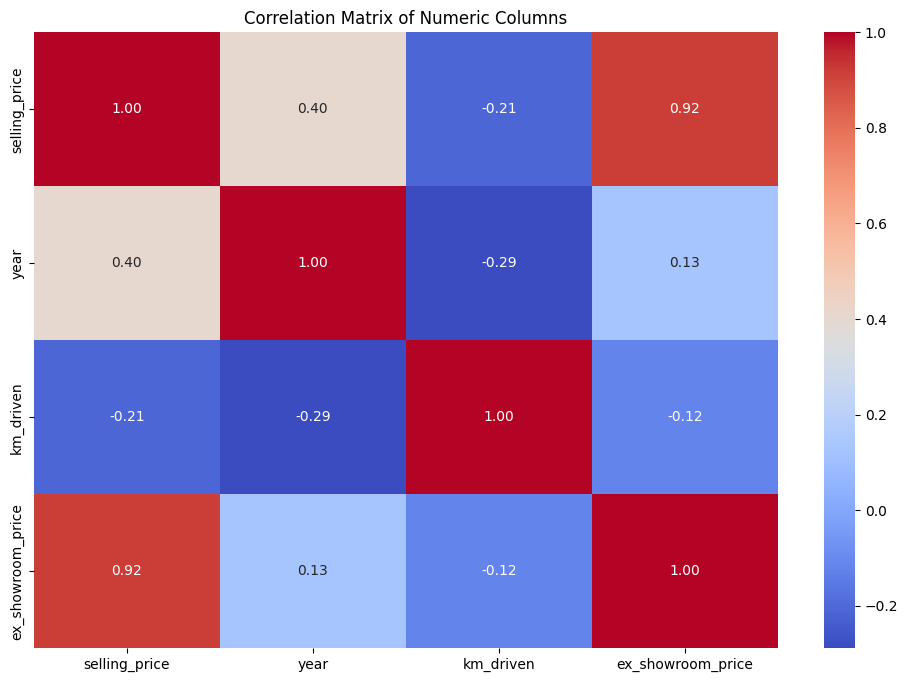

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['number'])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

#EDA 2

#CAR SALE DATASET

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd

In [39]:
path="/content/drive/MyDrive/dataset/car_sales.csv"
df=pd.read_csv(path)
df.head(23907)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [48]:
average_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean()

print(average_price_by_dealer)

highest_average_price = average_price_by_dealer.max()
dealer_with_highest_price = average_price_by_dealer[average_price_by_dealer == highest_average_price].index[0]

print(f"\nThe dealer with the highest average selling price is {dealer_with_highest_price} at ${highest_average_price:.2f}")

Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
New Castle Ford Lincoln Merc

2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [50]:
price_variation_by_brand = df.groupby('Company')['Price ($)'].std()

highest_variation_brand = price_variation_by_brand.idxmax()
highest_variation_amount = price_variation_by_brand.max()

print(f"The car brand with the highest price variation is {highest_variation_brand} with a standard deviation of ${highest_variation_amount:.2f}")

The car brand with the highest price variation is Lincoln with a standard deviation of $19658.05


3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

                count          mean           std     min      25%      50%  \
Transmission                                                                  
Auto          12571.0  28248.525972  13747.070597  1200.0  19000.0  24000.0   
Manual        11335.0  27914.710631  15862.871978  1700.0  17000.0  22001.0   

                  75%      max  
Transmission                    
Auto          35500.0  75700.0  
Manual        34000.0  85800.0  


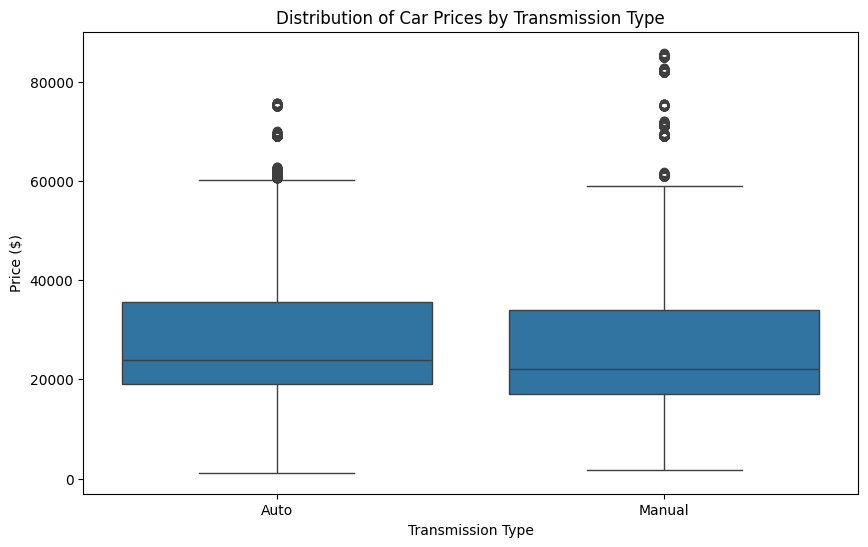

In [52]:
transmission_price_distribution = df.groupby('Transmission')['Price ($)'].describe()
print(transmission_price_distribution)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()

4.What is the distribution of car prices across different regions?

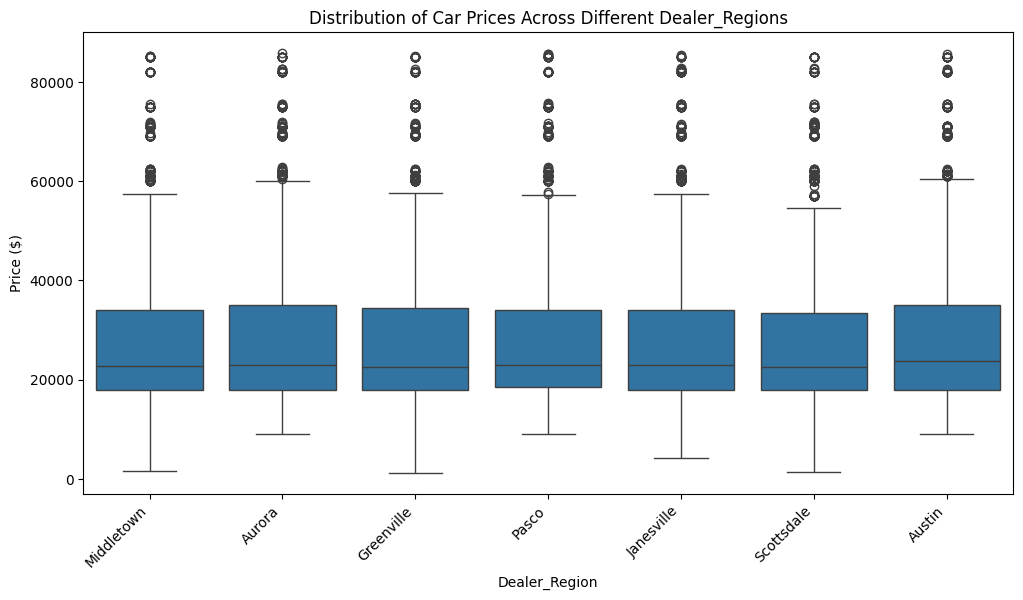

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Distribution of Car Prices Across Different Dealer_Regions')
plt.xlabel('Dealer_Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

5.What is the distribution of cars based on body styles?

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


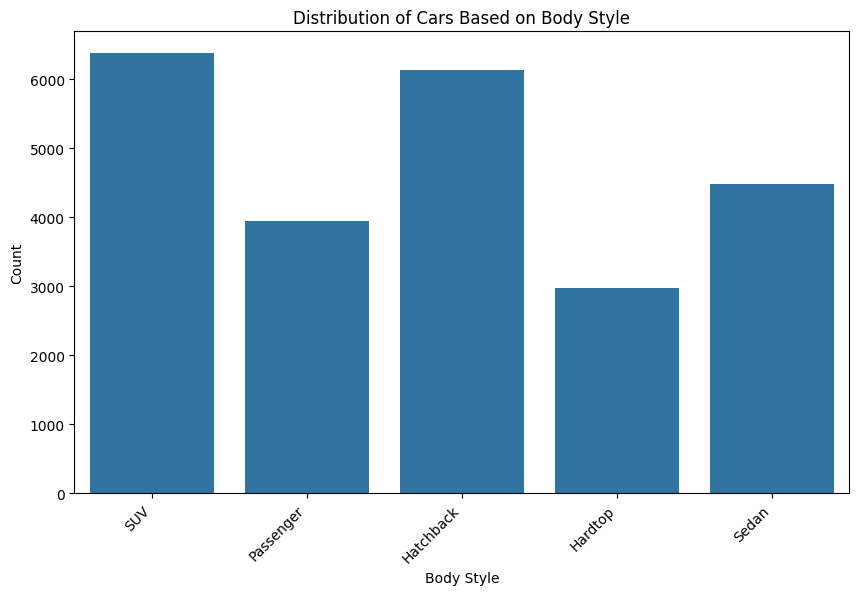

In [57]:
body_style_counts = df['Body Style'].value_counts()
print(body_style_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x='Body Style', data=df)
plt.title('Distribution of Cars Based on Body Style')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

6.How does the average selling price of cars vary by customer gender and annual income?

Annual Income  10080         13500     24000     85000     106000    121000    \
Gender                                                                          
Female              NaN  28132.038732       NaN       NaN   46001.0   20000.0   
Male            22801.0  27809.493111   61001.0   43000.0       NaN       NaN   

Annual Income  131000    145000    160000    170000    ...  6125000   \
Gender                                                 ...             
Female              NaN       NaN       NaN       NaN  ...       NaN   
Male            17000.0   16500.0   18334.0   14500.0  ...   19501.0   

Annual Income  6240000   6400000   6460000   6500000   6600000   6800000   \
Gender                                                                      
Female          42000.0   32001.0   14000.0       NaN       NaN       NaN   
Male                NaN   71000.0       NaN   25000.0   39000.0   15000.0   

Annual Income  7650000   8000000   11200000  
Gender                         

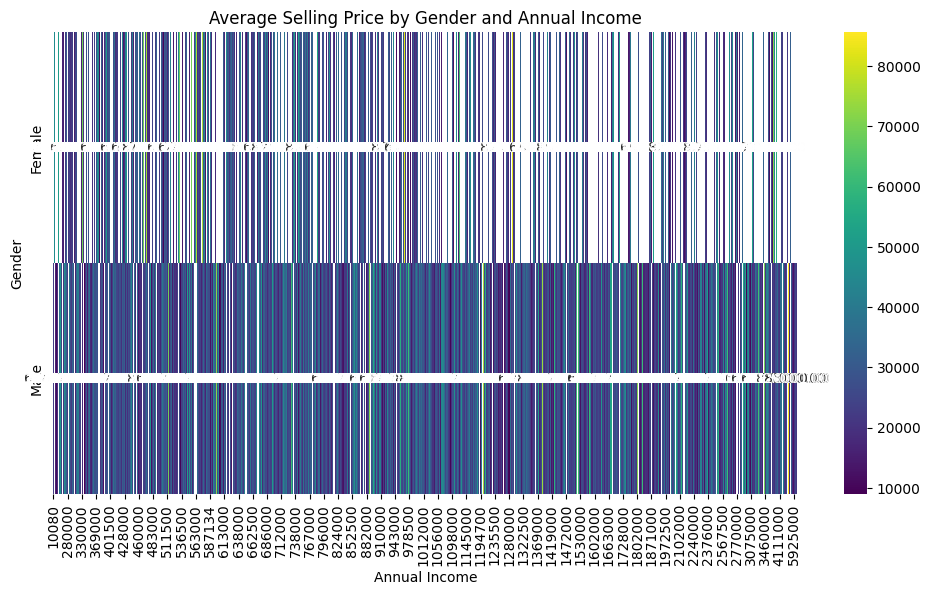

In [63]:
average_price_by_gender_income = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().unstack()
print(average_price_by_gender_income)

plt.figure(figsize=(12, 6))
sns.heatmap(average_price_by_gender_income, annot=True, fmt=".2f", cmap="viridis")
plt.title('Average Selling Price by Gender and Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Gender')
plt.show()

7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?

In [74]:
sales_by_region = df['Dealer_Region'].value_counts()
print(sales_by_region)

Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


8.How does the average car price differ between cars with different engine sizes?

In [72]:
average_price_by_engine_size = df.groupby('Engine')['Price ($)'].mean()

print(average_price_by_engine_size)

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


9.How do car prices vary based on the customer’s annual income bracket?

In [77]:
price_variation_by_income = df.groupby('Annual Income')['Price ($)'].describe()
price_variation_by_income

,count,mean,std,min,25%,50%,75%,max
Annual Income,,,,,,,,
10080,1.0,22801.000000,NaN,22801.0,22801.0,22801.0,22801.0,22801.0
13500,5273.0,27878.981415,14904.756077,1200.0,18000.0,22001.0,34000.0,85001.0
24000,1.0,61001.000000,NaN,61001.0,61001.0,61001.0,61001.0,61001.0
85000,1.0,43000.000000,NaN,43000.0,43000.0,43000.0,43000.0,43000.0
106000,1.0,46001.000000,NaN,46001.0,46001.0,46001.0,46001.0,46001.0
...,...,...,...,...,...,...,...,...
6600000,1.0,39000.000000,NaN,39000.0,39000.0,39000.0,39000.0,39000.0
6800000,1.0,15000.000000,NaN,15000.0,15000.0,15000.0,15000.0,15000.0
7650000,1.0,21000.000000,NaN,21000.0,21000.0,21000.0,21000.0,21000.0


10.What are the top 5 car models with the highest number of sales, and how does their price distribution look?

Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


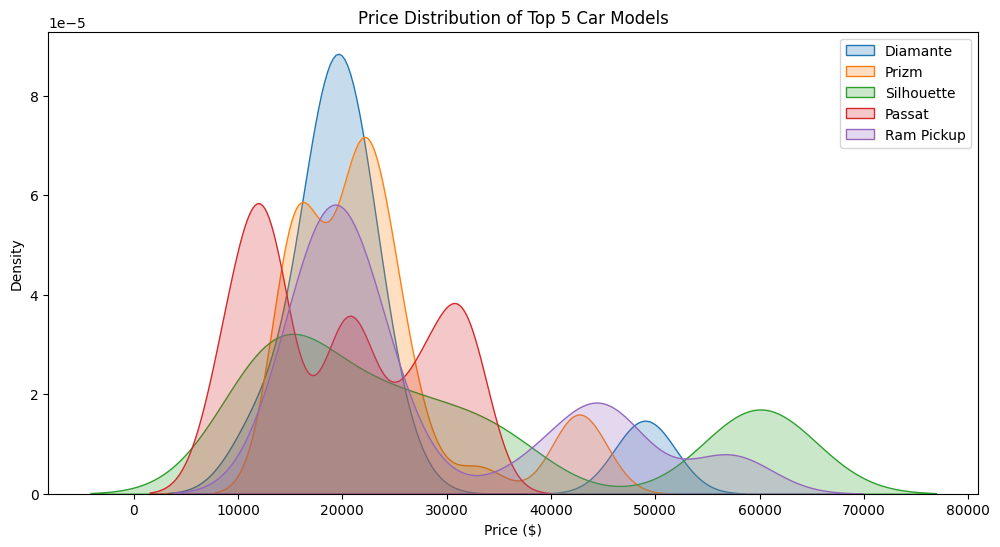

In [79]:
top_5_models = df['Model'].value_counts().head(5)
print(top_5_models)

plt.figure(figsize=(12, 6))
for model in top_5_models.index:
    sns.kdeplot(df[df['Model'] == model]['Price ($)'], label=model, fill=True)
plt.title('Price Distribution of Top 5 Car Models')
plt.xlabel('Price ($)')
plt.ylabel('Density')
plt.legend()
plt.show()

11.How does car price vary with engine size across different car colors, and which colors have the highest price variation?

Price variation by engine size and color:
 Color                             Black    Pale White           Red
Engine                                                             
DoubleÂ Overhead Camshaft  25766.451103  30347.987460  27434.392314
Overhead Camshaft          31732.967164  24327.767694  30153.405229

Standard deviation of prices for each color:
 Color
Black         4218.963967
Pale White    4256.938221
Red           1922.632470
dtype: float64

The color with the highest price variation is: Pale White


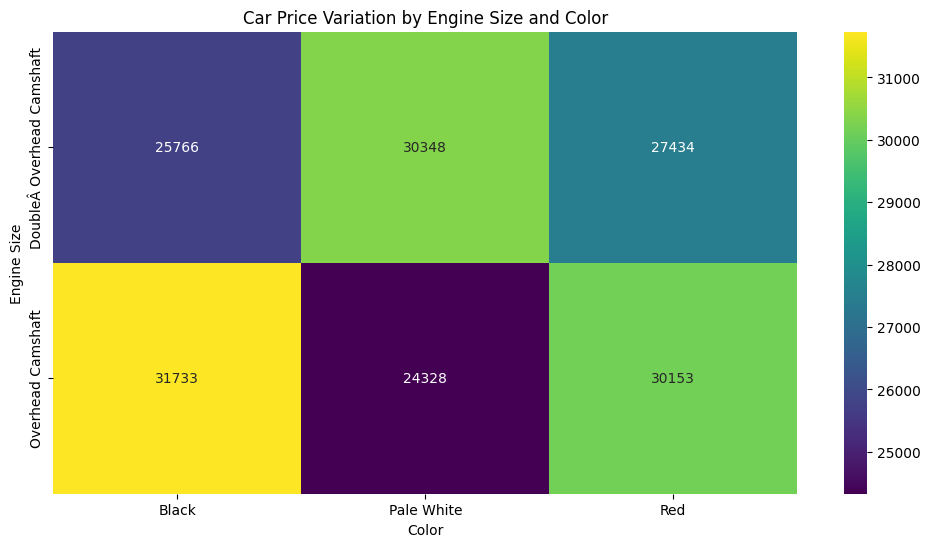

In [81]:
price_variation = df.groupby(['Engine', 'Color'])['Price ($)'].mean().unstack()

price_std = price_variation.std(axis=0)

highest_variation_color = price_std.idxmax()

print("Price variation by engine size and color:\n", price_variation)
print("\nStandard deviation of prices for each color:\n", price_std)
print(f"\nThe color with the highest price variation is: {highest_variation_color}")

plt.figure(figsize=(12, 6))
sns.heatmap(price_variation, annot=True, cmap='viridis', fmt=".0f")
plt.title('Car Price Variation by Engine Size and Color')
plt.xlabel('Color')
plt.ylabel('Engine Size')
plt.show()

12.Is there any seasonal trend in car sales based on the date of sale?

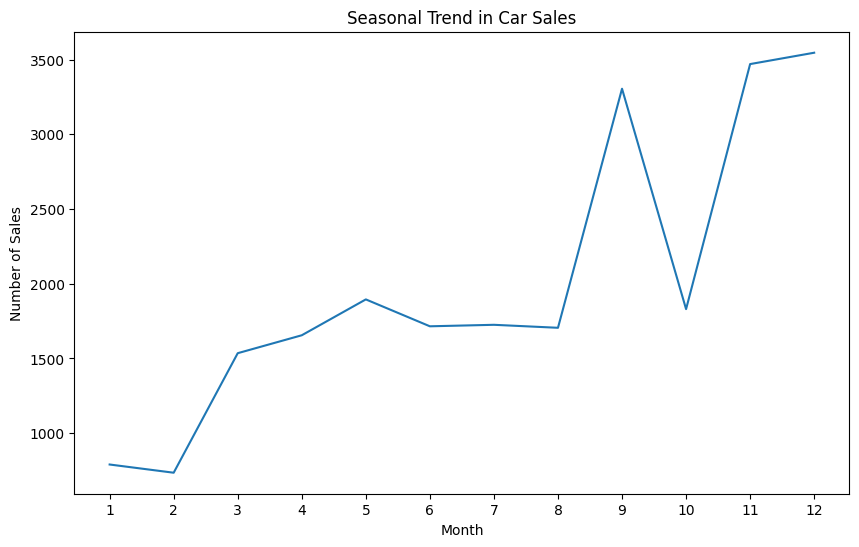

In [85]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month

monthly_sales = df.groupby('Month')['Price ($)'].count()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Seasonal Trend in Car Sales')
plt.xticks(range(1, 13))
plt.show()

13.How does the car price distribution change when considering different combinations of body style and transmission type?

                          count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.056434  11000.0  19001.0   

                           

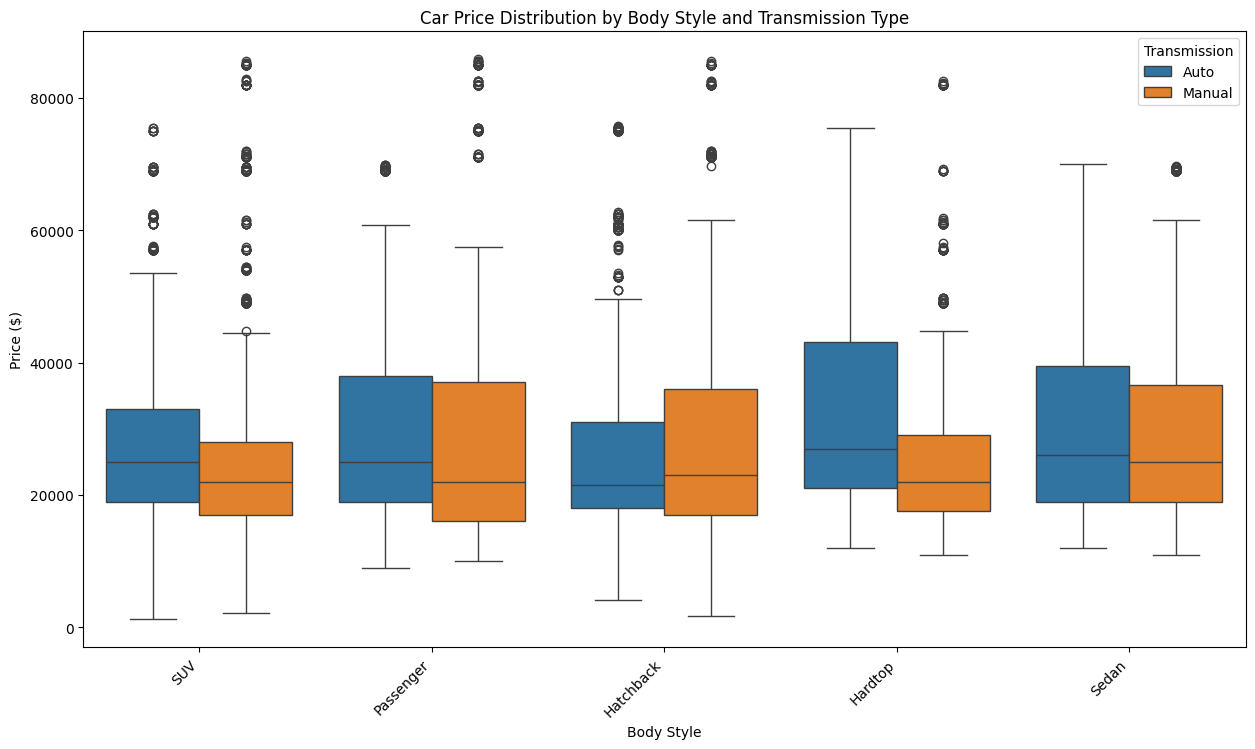

In [87]:
body_transmission_price = df.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()
print(body_transmission_price)

plt.figure(figsize=(15, 8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

14.What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

               Price ($)  Engine_Size  Annual Income
Price ($)       1.000000          NaN       0.012065
Engine_Size          NaN          NaN            NaN
Annual Income   0.012065          NaN       1.000000


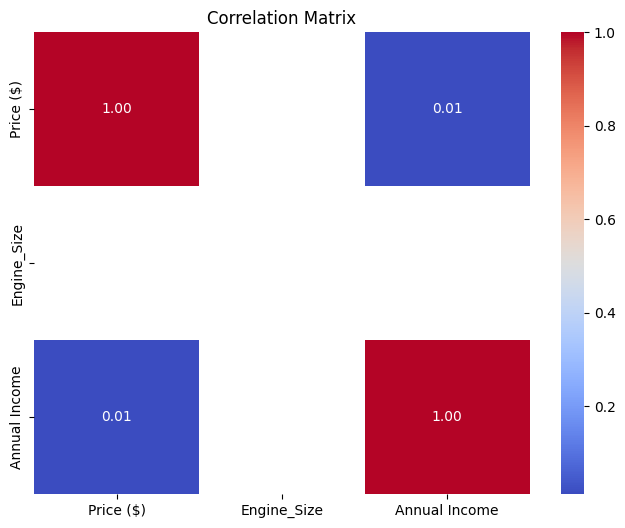

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

df['Engine_Size'] = pd.to_numeric(df['Engine'].str.extract(r'(\d+\.?\d*)').iloc[:, 0], errors='coerce')

correlation_matrix = df[['Price ($)', 'Engine_Size', 'Annual Income']].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

15.How does the average car price vary across different car models and engine types?

Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


<Figure size 1200x600 with 0 Axes>

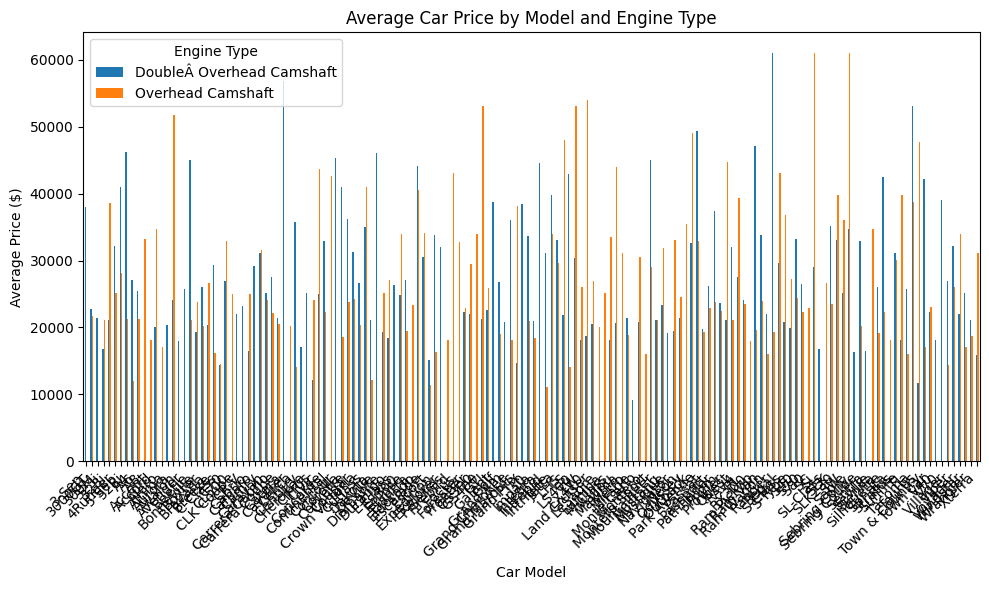

In [98]:
average_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()
print(average_price_by_model_engine)

plt.figure(figsize=(12, 6))
average_price_by_model_engine.plot(kind='bar', figsize=(10, 6))
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Car Model')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Engine Type')
plt.tight_layout()
plt.show()

#EDA 3

#AMAZON SALES DATASET

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
import pandas as pd

In [103]:
path="/content/drive/MyDrive/dataset/amazon_sales.csv"
df=pd.read_csv(path)
df.head(1466)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

1.What is the average rating for each product category?

In [110]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

average_rating_by_category = df.groupby('category')['rating'].mean()
average_rating_by_category

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


2.What are the top rating_count products by category?

In [114]:
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

top_rated_by_category = df.groupby('category').apply(lambda x: x.nlargest(1, 'rating_count'))
print(top_rated_by_category[['product_name', 'rating_count']])

                                                                                              product_name  \
category                                                                                                     
Car&Motorbike|CarAccessories|InteriorAccessorie... 1157  Reffair AX30 [MAX] Portable Air Purifier for C...   
Computers&Accessories|Accessories&Peripherals|A... 695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...   
Computers&Accessories|Accessories&Peripherals|A... 906   Hp Wired On Ear Headphones With Mic With 3.5 M...   
Computers&Accessories|Accessories&Peripherals|A... 748   JBL Commercial CSLM20B Auxiliary Omnidirection...   
Computers&Accessories|Accessories&Peripherals|A... 844   Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...   
...                                                                                                    ...   
OfficeProducts|OfficePaperProducts|Paper|Statio... 616   Classmate Octane Neon- Blue Gel Pens(Pack of 5...   
OfficeProd

<ipython-input-114-21fa61a3ec60>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_rated_by_category = df.groupby('category').apply(lambda x: x.nlargest(1, 'rating_count'))


3.What is the distribution of discounted prices vs. actual prices?

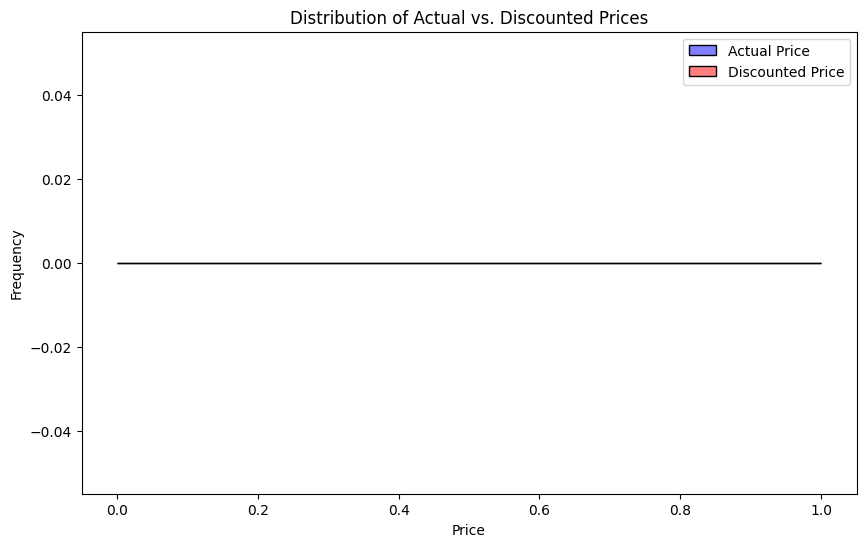

In [123]:
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(df['actual_price'], kde=True, label='Actual Price', color='blue')
sns.histplot(df['discounted_price'], kde=True, label='Discounted Price', color='red')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs. Discounted Prices')
plt.legend()
plt.show()

df['price_difference'] = df['actual_price'] - df['discounted_price']

4.How does the average discount percentage vary across categories?

In [125]:
df['discount_percentage'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100

average_discount_by_category = df.groupby('category')['discount_percentage'].mean()

average_discount_by_category

,discount_percentage
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,NaN
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",NaN
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",NaN
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",NaN


5.What are the most popular product names?

In [127]:
popular_products = df['product_name'].value_counts().head(10)
popular_products

,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",3
"Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3
Flix Micro Usb Cable For Smartphone (Black),3
"Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating",3
"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",3
"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",3
"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",3


6.What are the most popular product keywords?

In [130]:
from collections import Counter

def extract_keywords(text):

    keywords = text.lower().split()
    return keywords

all_keywords = []
for product_name in df['product_name']:
    all_keywords.extend(extract_keywords(str(product_name)))

keyword_counts = Counter(all_keywords)
most_common_keywords = keyword_counts.most_common(5)

print("Most popular product keywords:")
for keyword, count in most_common_keywords:
    print(f"- {keyword}: {count}")


Most popular product keywords:
- with: 751
- for: 672
- |: 457
- &: 432
- usb: 377


7.What are the most popular product reviews?

In [132]:
if 'review_count' in df.columns:
    popular_reviews = df.nlargest(10, 'review_count')
    print(popular_reviews[['product_name', 'review_count']])
else:
    print("No 'review_count' column found. Please define a metric for review popularity.")

No 'review_count' column found. Please define a metric for review popularity.


8.What is the correlation between discounted_price and rating?

In [134]:
correlation_price_rating = df['discounted_price'].corr(df['rating'])
print(f"The correlation between discounted_price and rating is: {correlation_price_rating}")

The correlation between discounted_price and rating is: nan


9.What are the Top 5 categories based on the highest ratings?

In [138]:
top_5_categories = average_rating_by_category.nlargest(5)
print(f"The top 5 categories based on the highest ratings are:\n{top_5_categories}")

The top 5 categories based on the highest ratings are:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|Components|Memory                                     4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


10.Identify any potential areas for improvement or optimization based on the data analysis.
- Potential areas for improvement and optimization:

 -  Missing Value Imputation:
   - The code identifies missing values but doesn't impute them.  
   - Strategically impute missing 'ex_showroom_price' and other numerical features using methods like mean/median imputation or more sophisticated techniques like KNN imputation, depending on the data distribution and relationships with other variables.  For categorical features, consider using the mode or a more advanced method.

 - Outlier Handling (Beyond IQR):
   - While IQR is used for 'km_driven', consider exploring other columns for outliers (e.g., 'selling_price', 'ex_showroom_price').
   - Explore more robust outlier detection methods like the Z-score or modified Z-score, or visualize the data using box plots to better understand the outlier distribution.
   - Instead of removing outliers, consider transforming them (e.g., using log transformation) or using models that are less sensitive to outliers.

 - Feature Engineering:
   - Create new features that might improve model performance.  For example:
   - Combine 'year' and 'km_driven' into a feature representing usage rate (km/year).
   - Create categorical features from numerical ones (e.g., 'age_groups' instead of just the bike age).
   - Extract relevant information from the 'name' column or use NLP techniques to generate additional features.
   - Convert 'Engine' to a numerical column to use for regression models in the car_sales dataset.

 - Data Visualization Enhancements:
   - The current visualizations are functional but can be improved.
   - Explore different plot types (histograms, box plots, violin plots) to better understand distributions and relationships.  
   - Add more informative labels, titles, and legends to visualizations.  Improve color schemes for better readability.
   - Consider interactive visualizations for deeper exploration of the data.

 - Advanced Statistical Analysis:
   - Explore more advanced statistical techniques such as ANOVA or t-tests to compare different groups.
   - Regression analysis can provide deeper insight into the relationship between different variables and model predictions.

 - Error Handling and Data Cleaning:
   - Handle errors when converting data types (e.g., using try-except blocks). Ensure that numerical columns are handled correctly.
   - Data Cleaning: Inspect and clean data. Identify inconsistent data entries or formatting inconsistencies.

 - Code Readability:
   - Add comments to explain the purpose of different code sections.
   - Use more descriptive variable names.
   - Organize code into functions for better modularity and reusability.

 - Advanced Modeling:
   - Instead of just exploring correlations and distributions, build predictive models (regression, classification). This allows for testing hypotheses about the impact of various factors and making predictions about the target variable(s).


#EDA 4

#SPOTIFY DATA : POPULAR ARTISTS & TRACKS

In [140]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
import pandas as pd

In [142]:
path="/content/drive/MyDrive/dataset/spotify_data.csv"
df=pd.read_csv(path)
df.head(441)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

In [145]:
print(df.isnull().sum())

for col in df.select_dtypes(include=['number']):
    df[col] = df[col].fillna(df[col].mean())

print(f"Number of duplicate rows: {df.duplicated().sum()}")

df.drop_duplicates(inplace=True)

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of duplicate rows: 0


2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

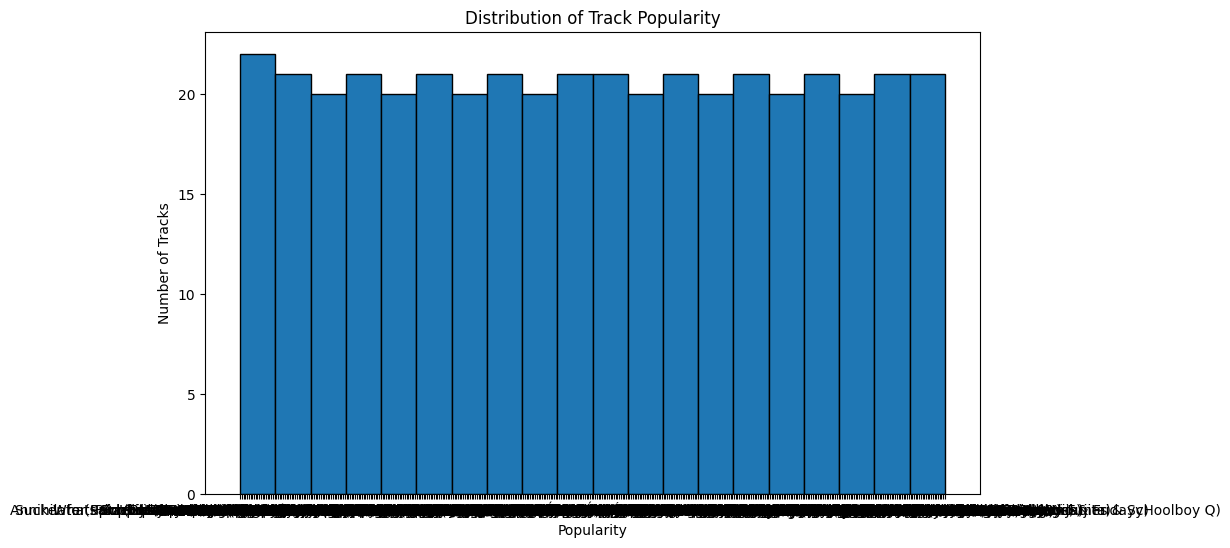

In [149]:
plt.figure(figsize=(10, 6))
plt.hist(df['Track Name'], bins=20, edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Track Popularity')
plt.show()

3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

In [155]:
import plotly.express as px

fig = px.scatter(df, x="Popularity", y="Duration (ms)", title="Relationship between Popularity and Duration of Tracks")

fig.show()

4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

The artist with the highest number of tracks is: Drake


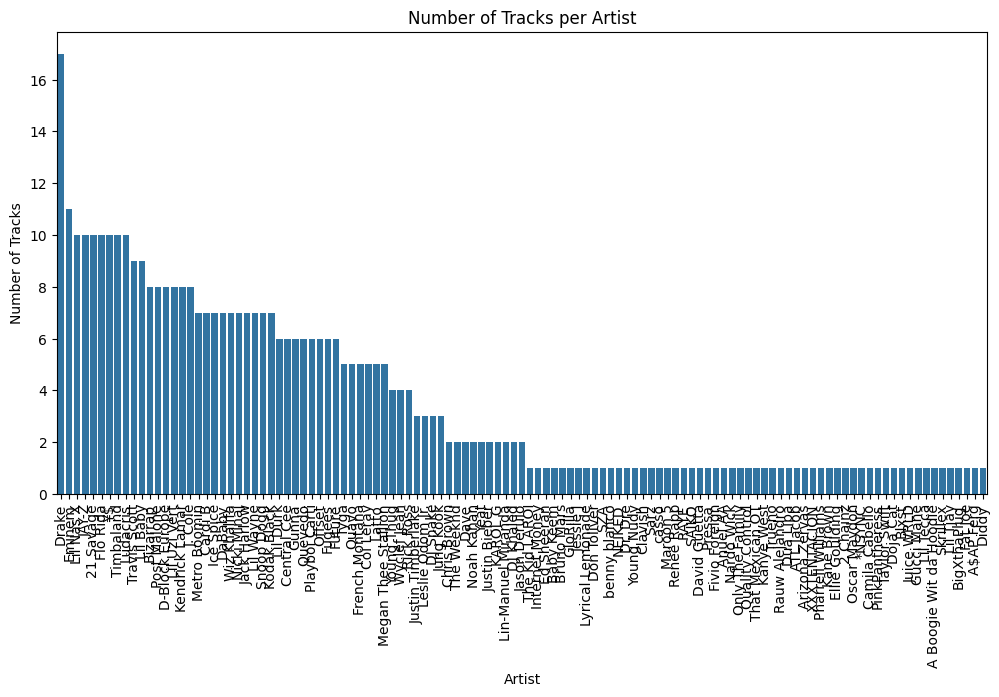

In [159]:
artist_counts = df['Artist'].value_counts()
highest_track_artist = artist_counts.index[0]
print(f"The artist with the highest number of tracks is: {highest_track_artist}")

plt.figure(figsize=(12, 6))
sns.countplot(x='Artist', data=df, order=artist_counts.index)
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.title('Number of Tracks per Artist')
plt.show()

5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [161]:
least_popular_tracks = df.nsmallest(5, 'Popularity')
print(least_popular_tracks[['Artist', 'Track Name']])

             Artist                     Track Name
207          Pressa  Attachments (feat. Coi Leray)
231   Justin Bieber                     Intentions
413  French Montana                Splash Brothers
225        Lil Baby                  On Me - Remix
407     Wyclef Jean      911 (feat. Mary J. Blige)


6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

In [163]:
top_5_artists = df['Artist'].value_counts().head(5).index

average_popularity_by_artist = {}
for artist in top_5_artists:
    artist_tracks = df[df['Artist'] == artist]
    average_popularity = artist_tracks['Popularity'].mean()
    average_popularity_by_artist[artist] = average_popularity

highest_avg_popularity_artist = max(average_popularity_by_artist, key=average_popularity_by_artist.get)

print("Average popularity for top 5 artists:")
for artist, avg_popularity in average_popularity_by_artist.items():
    print(f"- {artist}: {avg_popularity}")

print(f"\nThe artist with the highest average popularity among the top 5 is: {highest_avg_popularity_artist}")

Average popularity for top 5 artists:
- Drake: 82.88235294117646
- Eminem: 83.63636363636364
- Lil Nas X: 75.9
- JAY-Z: 77.9
- 21 Savage: 83.8

The artist with the highest average popularity among the top 5 is: 21 Savage


7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [165]:
top_5_artists = df['Artist'].value_counts().head(5).index

most_popular_tracks_by_artist = {}
for artist in top_5_artists:
    artist_tracks = df[df['Artist'] == artist]
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]
    most_popular_tracks_by_artist[artist] = most_popular_track['Track Name']

print("Most popular tracks for the top 5 artists:")
for artist, track_name in most_popular_tracks_by_artist.items():
    print(f"- {artist}: {track_name}")

Most popular tracks for the top 5 artists:
- Drake: Rich Baby Daddy (feat. Sexyy Red & SZA)
- Eminem: Without Me
- Lil Nas X: THATS WHAT I WANT
- JAY-Z: Ni**as In Paris
- 21 Savage: redrum


8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

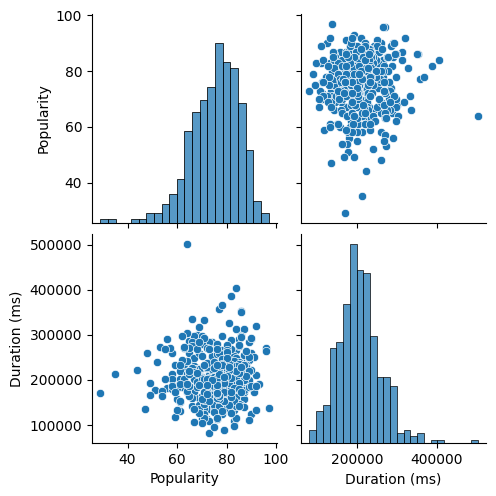

In [167]:
numeric_cols = df.select_dtypes(include=['number'])
sns.pairplot(numeric_cols)
plt.show()

9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

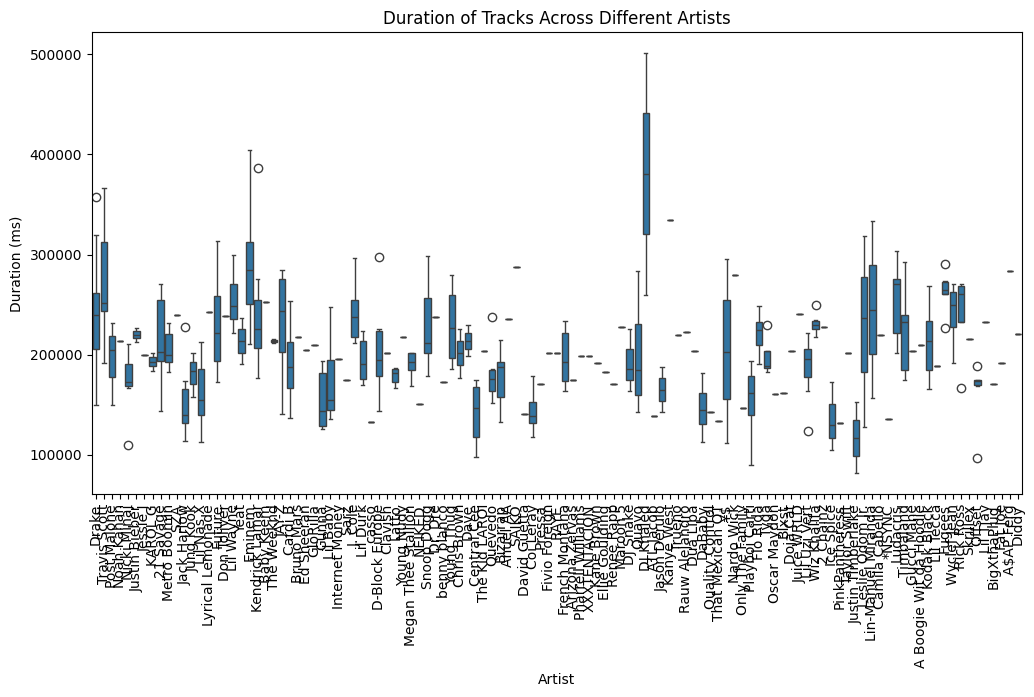

In [169]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df)
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Duration of Tracks Across Different Artists')
plt.show()

10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

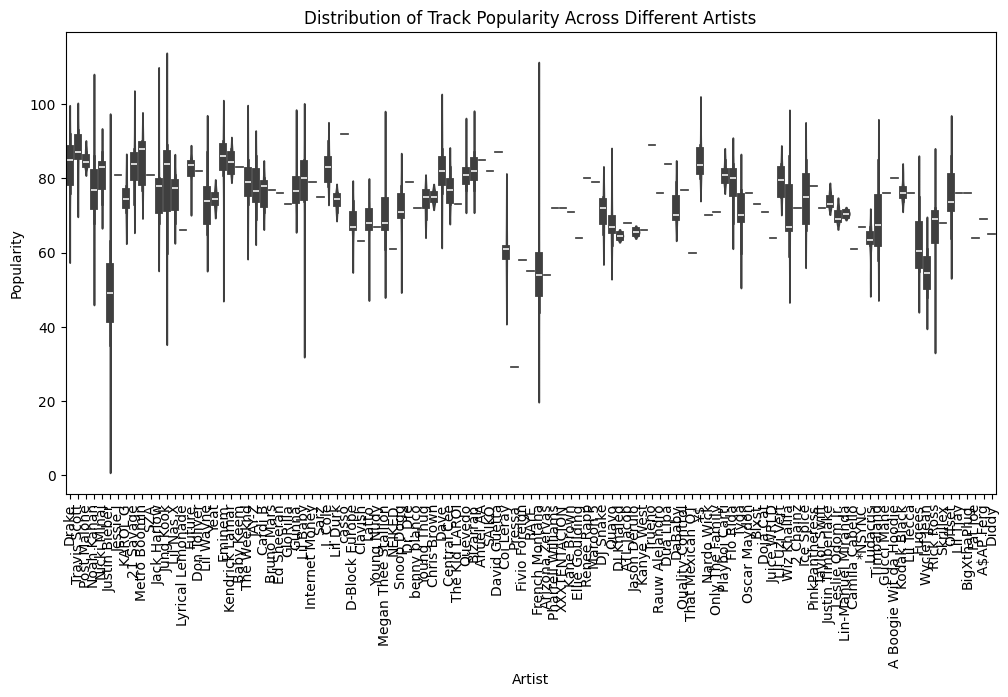

In [171]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=df)
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Distribution of Track Popularity Across Different Artists')
plt.show()